<a href="https://colab.research.google.com/github/Gabriela3005a/Modelos_aprendizaje/blob/main/TP1/01_Deber1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df= '/content/drive/MyDrive/MAESTRIA_BIG_DATA/Modelos_y_Aprendizaje/Clase_1/Deber1/mnist_train.csv'

In [4]:
test_df= '/content/drive/MyDrive/MAESTRIA_BIG_DATA/Modelos_y_Aprendizaje/Clase_1/Deber1/mnist_test.csv'

In [5]:
from google.colab import files

# Sube el archivo 'mnist_train.csv'
uploaded = files.upload()

# Importa pandas y carga el DataFrame
import pandas as pd
train_df = pd.read_csv('mnist_train.csv')


Saving mnist_test.csv to mnist_test.csv
Saving mnist_train.csv to mnist_train.csv


In [7]:
test_df

'/content/drive/MyDrive/MAESTRIA_BIG_DATA/Modelos_y_Aprendizaje/Clase_1/Deber1/mnist_test.csv'

In [8]:
#Verificar la presencia de valores nulos (NaN) en un DataFrame
train_df.isna()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#El resultado es una tupla que representa las dimensiones del DataFrame, es decir, el número de filas y columnas.
train_df.shape

(60000, 785)

In [12]:
#Visión rápida de la cantidad de valores nulos en cada columna de train_df expresada como una proporción
# del total de filas en esa columna
for c in train_df.columns:
    print(f'{c} {sum(train_df.isna()[c]) / train_df.shape[0]} ')

label 0.0 
1x1 0.0 
1x2 0.0 
1x3 0.0 
1x4 0.0 
1x5 0.0 
1x6 0.0 
1x7 0.0 
1x8 0.0 
1x9 0.0 
1x10 0.0 
1x11 0.0 
1x12 0.0 
1x13 0.0 
1x14 0.0 
1x15 0.0 
1x16 0.0 
1x17 0.0 
1x18 0.0 
1x19 0.0 
1x20 0.0 
1x21 0.0 
1x22 0.0 
1x23 0.0 
1x24 0.0 
1x25 0.0 
1x26 0.0 
1x27 0.0 
1x28 0.0 
2x1 0.0 
2x2 0.0 
2x3 0.0 
2x4 0.0 
2x5 0.0 
2x6 0.0 
2x7 0.0 
2x8 0.0 
2x9 0.0 
2x10 0.0 
2x11 0.0 
2x12 0.0 
2x13 0.0 
2x14 0.0 
2x15 0.0 
2x16 0.0 
2x17 0.0 
2x18 0.0 
2x19 0.0 
2x20 0.0 
2x21 0.0 
2x22 0.0 
2x23 0.0 
2x24 0.0 
2x25 0.0 
2x26 0.0 
2x27 0.0 
2x28 0.0 
3x1 0.0 
3x2 0.0 
3x3 0.0 
3x4 0.0 
3x5 0.0 
3x6 0.0 
3x7 0.0 
3x8 0.0 
3x9 0.0 
3x10 0.0 
3x11 0.0 
3x12 0.0 
3x13 0.0 
3x14 0.0 
3x15 0.0 
3x16 0.0 
3x17 0.0 
3x18 0.0 
3x19 0.0 
3x20 0.0 
3x21 0.0 
3x22 0.0 
3x23 0.0 
3x24 0.0 
3x25 0.0 
3x26 0.0 
3x27 0.0 
3x28 0.0 
4x1 0.0 
4x2 0.0 
4x3 0.0 
4x4 0.0 
4x5 0.0 
4x6 0.0 
4x7 0.0 
4x8 0.0 
4x9 0.0 
4x10 0.0 
4x11 0.0 
4x12 0.0 
4x13 0.0 
4x14 0.0 
4x15 0.0 
4x16 0.0 
4x17 0.0 
4x18 0.0 
4x19 

In [13]:
# Verificar la presencia de valores nulos en un DataFrame
if train_df.isna().any().any():
    print("Hay valores nulos en el DataFrame.")
else:
    print("No hay valores nulos en el DataFrame.")


No hay valores nulos en el DataFrame.


In [14]:
# Crear características adicionales, se toma la matriz de entrada X que representan los datos de imagen y crear nuevas caracteristicas.
def create_features(X):
    # Suma de los valores de intensidad de los píxeles
    X_sum = np.sum(X, axis=1)

    # Simetría izquierda-derecha
    X_lr_symmetry = X[:, :392] - X[:, 392:][:,::-1]

    # Simetría arriba-abajo
    X_ud_symmetry = X[:, :392] - X[:, 392:][::-1]

    # Concatenar todas las características
    X_extended = np.c_[X, X_sum, X_lr_symmetry, X_ud_symmetry]

    return X_extended


In [15]:
# Cargar el conjunto de datos MNIST y dividirlos en conjuntos de entrenamiento y prueba:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"].values.astype('float32'), mnist["target"].values.astype('int')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:100: UserWarning: A network error occurred while downloading https://openml.org/data/v1/download/52667. Retrying...
  warn(


In [16]:
#La función train_test_split es comúnmente utilizada en machine learning para dividir un conjunto de datos en
#subconjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

In [17]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
# El 20% de los datos se asignarán al conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Normalizar los datos (escalar)
#El propósito de la normalización es asegurar que todas las características tengan una escala similar (media de 0 y una desviación estándar de 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Verificar las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (56000, 784)
Dimensiones de y_train: (56000,)
Dimensiones de X_test: (14000, 784)
Dimensiones de y_test: (14000,)


In [29]:
# Crear características para conjuntos de entrenamiento y prueba
# Se extienden las características originales de los conjuntos de entrenamiento y prueba utilizando la función create_features
X_train_extended = create_features(X_train)
X_test_extended = create_features(X_test)

In [30]:
# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Se ha creado características adicionales y esas son las que deberían usarse al entrenar el modelo.
model.fit(X_train_extended, y_train)



RandomForestClassifier(random_state=42)

In [31]:
# Evaluar el modelo en el conjunto de validación (conjunto de prueba extendido)
y_pred = model.predict(X_test_extended)


In [34]:
# Calcular la matriz de confusión
#La matriz evaluar el rendimiento de un modelo, y a partir de ella se pueden calcular diversas métricas como la precisión,la sensibilidad,la especificidad.
conf_matrix = confusion_matrix(y_test, y_pred)


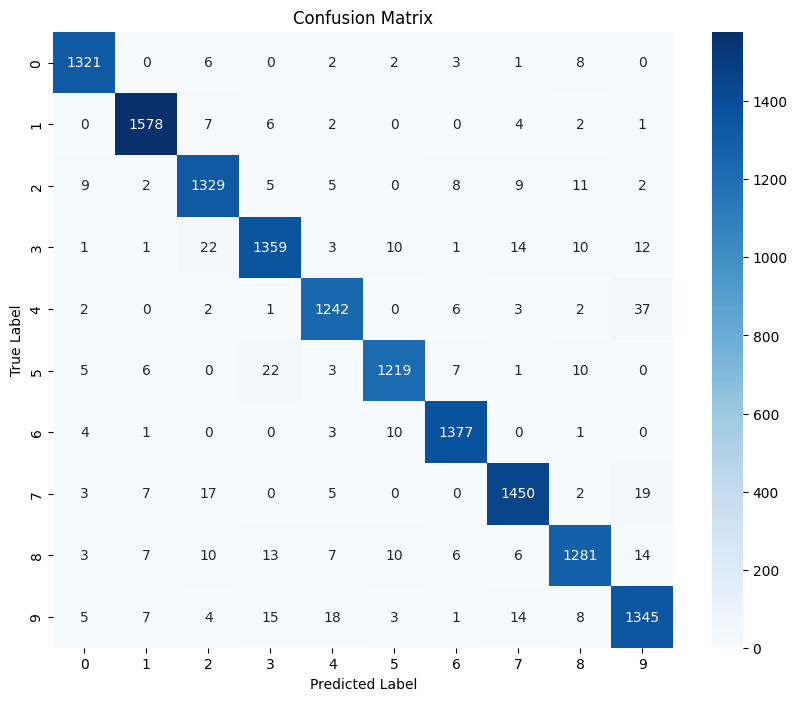

In [35]:
# Visualizar la matriz de confusión
#Se visualiza la matriz de confusión usando un mapa de calor, donde los colores indican la cantidad de instancias clasificadas en cada categoría
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

La matriz de confusión, las filas representan las clases reales, mientras que las columnas representan las clases predichas por el modelo. Cada entrada en la matriz indica la cantidad de instancias pertenecientes a una clase específica.

-True Positive (TP): El modelo predijo correctamente que las instancias pertenecen a la clase positiva.

-True Negative (TN): El modelo predijo correctamente que las instancias no pertenecen a la clase positiva.

-False Positive (FP): El modelo predijo incorrectamente que las instancias pertenecen a la clase positiva (falso positivo).

-False Negative (FN): El modelo predijo incorrectamente que las instancias no pertenecen a la clase positiva (falso negativo).



Para la clase 0, el modelo predijo correctamente 1321 instancias (TP).
Para la clase 1, el modelo predijo correctamente 1578 instancias (TP).

En la diagonal principal, encuentras los valores correctos (TP), mientras que fuera de la diagonal, encuentras los errores (FP y FN).